# World Happiness

The World Happiness Report provides an annual analysis of what factors contribute to people's well-being and happiness. They examine many features that range from country economics to self-reported polls. For this project, we would like to examine factors that contribute to happiness, much like the World Happiness Report.

## Obtaining the Data

We obtained the rankings found in global polls about how people ranked their happiness and various aspects of their lives from 2015 to 2019. The data points are separated by country and region. We start by concatenating all the data together for easier cleaning and managing. We would also like to add another column to label the year of each data point.

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Configure Pandas display settings.
pd.options.display.max_rows = 15

# Import the data sets.
happy_list = []
years = [2015, 2016, 2017, 2018, 2019]
for year in years:
  happy_list.append(pd.read_csv(str(year) + '.csv'))

# Add a column to each dataset for the year.
for happy, year in zip(happy_list, years):
  happy['Year'] = year

happy15, happy16, happy17, happy18, happy19 = happy_list

# Concatenate all the data together.
happy = pd.concat(happy_list)

happy

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,152.0,Rwanda,3.334,0.359,0.711,0.614,0.555,0.411
152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,153.0,Tanzania,3.231,0.476,0.885,0.499,0.417,0.147
153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,154.0,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.025
154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,155.0,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.035


## Cleaning the Data

Before we can start working with the data, we must ensure that it is properly combined, cleaned, and free of errors.

### Name Unification

The concatenation did not properly occur because it generated large columns with no values. With a quick review, it is apparent that the naming conventions of the columns have changed. To fix this, we must normalize all columns between the years.

Our first step is to ensure that the columns for each year correspond to each other. For instance, the data for 2017 are not separated by whitespace. Instead, it is separated by periods. We simply rename each column for 2017.

In [111]:
happy17.rename(columns={
    'Happiness.Score': 'Happiness Score',
    'Happiness.Rank': 'Happiness Rank',
    'Whisker.low': 'Lower Confidence Interval',
    'Whisker.high': 'Upper Confidence Interval',
    'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
    'Health..Life.Expectancy.': 'Health (Life Expectancy)',
    'Trust..Government.Corruption.': 'Trust (Government Corruption)',
    'Dystopia.Residual': 'Dystopia Residual'
}, inplace=True)

happy17

,Country,Happiness Rank,Happiness Score,Upper Confidence Interval,Lower Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,2017
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,2017
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2017
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,2017


Furthermore, the data for 2018 and 2019 contain the same information but follow a different naming scheme than the previous year. We also need to rename each of these columns.

In [112]:
for happy in [happy18, happy19]:
    happy.rename(columns={
        'Overall rank': 'Happiness Rank',
        'Country or region': 'Country',
        'Score': 'Happiness Score',
        'GDP per capita': 'Economy (GDP per Capita)',
        'Social support': 'Family',
        'Healthy life expectancy': 'Health (Life Expectancy)',
        'Freedom to make life choices': 'Freedom',
        'Perceptions of corruption': 'Trust (Government Corruption)'
    }, inplace=True)

happy18

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,2018
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,2018
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,2018
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,2018


Next, between the data sets, some contain a column for standard error in the happiness score. Others, instead, have the upper and lower confidence intervals. We can combine the two columns by aggregating the upper and lower confidence levels. We create a new column for the standard error and calculate it as the difference between the upper confidence interval and the happiness score.


In [113]:
for happy in [happy16, happy17]:
    happy['Standard Error'] = happy['Upper Confidence Interval'] - \
                              happy['Happiness Score']
    happy.drop(columns=['Upper Confidence Interval',
                        'Lower Confidence Interval'], inplace=True)

happy16

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Standard Error
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016,0.066
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016,0.081
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,0.168
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016,0.077
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016,0.062
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016,0.080
153,Afghanistan,Southern Asia,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016,0.072
154,Togo,Sub-Saharan Africa,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016,0.111
155,Syria,Middle East and Northern Africa,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016,0.133


### Missing Values

After renaming the columns, we can check for any missing values in the combined data set. We start by recombining the edited data columns into one data frame.

In [114]:
happy = pd.concat(happy_list)
happy.reset_index(drop=True, inplace=True)
happy

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,NaN,152,3.334,NaN,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,NaN,2019
778,Tanzania,NaN,153,3.231,NaN,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,NaN,2019
779,Afghanistan,NaN,154,3.203,NaN,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,NaN,2019
780,Central African Republic,NaN,155,3.083,NaN,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,NaN,2019


We now summarize any missing values that are in the data frame.

In [115]:
happy.isnull().sum()

Country                            0
Region                           467
Happiness Rank                     0
Happiness Score                    0
Standard Error                   312
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      1
Generosity                         0
Dystopia Residual                312
Year                               0
dtype: int64

In [116]:
happy[happy['Region'].isnull() |
      happy['Standard Error'].isnull() |
      happy['Trust (Government Corruption)'].isnull() |
      happy['Dystopia Residual'].isnull()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
315,Norway,NaN,1,7.537,0.057445,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027,2017
316,Denmark,NaN,2,7.522,0.059728,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2.313707,2017
317,Iceland,NaN,3,7.504,0.118030,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,2.322715,2017
318,Switzerland,NaN,4,7.494,0.067772,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,2.276716,2017
319,Finland,NaN,5,7.469,0.058542,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,2.430182,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,NaN,152,3.334,NaN,0.359000,0.711000,0.614000,0.555000,0.411000,0.217000,NaN,2019
778,Tanzania,NaN,153,3.231,NaN,0.476000,0.885000,0.499000,0.417000,0.147000,0.276000,NaN,2019
779,Afghanistan,NaN,154,3.203,NaN,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,NaN,2019
780,Central African Republic,NaN,155,3.083,NaN,0.026000,0.000000,0.105000,0.225000,0.035000,0.235000,NaN,2019


Upon closer inspection, there are four columns with missing values: region, standard error, trust, and dystopia residual.

#### Missing Regions

The missing values for the region seem to be missing not at random (MNAR) because there are some years where the data was not included. Each country corresponds to a larger area from another year's data set. We can simply map the missing values because there are no missing values from the country field.

In [117]:
# Create a dictionary mapping country to region from 2015 and 2016.
regions = dict(zip(happy15['Country'], happy15['Region']))
regions.update(dict(zip(happy16['Country'], happy16['Region'])))

# Apply mapping to each missing region.
happy['Region'].fillna(happy['Country'].map(regions), inplace=True)
happy

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,Sub-Saharan Africa,152,3.334,NaN,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,NaN,2019
778,Tanzania,Sub-Saharan Africa,153,3.231,NaN,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,NaN,2019
779,Afghanistan,Southern Asia,154,3.203,NaN,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,NaN,2019
780,Central African Republic,Sub-Saharan Africa,155,3.083,NaN,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,NaN,2019


In [118]:
happy[happy['Region'].isnull()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
347,Taiwan Province of China,NaN,33,6.422,0.072596,1.433627,1.384565,0.793984,0.361467,0.063829,0.258360,2.126607,2017
385,"Hong Kong S.A.R., China",NaN,71,5.472,0.077594,1.551675,1.262791,0.943062,0.490969,0.293934,0.374466,0.554633,2017
507,Trinidad & Tobago,NaN,38,6.192,NaN,1.223000,1.492000,0.564000,0.575000,0.019000,0.171000,NaN,2018
527,Northern Cyprus,NaN,58,5.835,NaN,1.229000,1.211000,0.909000,0.495000,0.154000,0.179000,NaN,2018
664,Trinidad & Tobago,NaN,39,6.192,NaN,1.231000,1.477000,0.713000,0.489000,0.016000,0.185000,NaN,2019
689,Northern Cyprus,NaN,64,5.718,NaN,1.263000,1.252000,1.042000,0.417000,0.162000,0.191000,NaN,2019
709,North Macedonia,NaN,84,5.274,NaN,0.983000,1.294000,0.838000,0.345000,0.034000,0.185000,NaN,2019
745,Gambia,NaN,120,4.516,NaN,0.308000,0.939000,0.428000,0.382000,0.167000,0.269000,NaN,2019


When reexamining the count of missing region values, eight remain empty. These can be attributed to a break in naming conventions. We can simply unify the country names or fill each region in manually to complete the missing values.

In [119]:
# Unify country names.
happy.at[347, 'Country'] = 'Taiwan'
happy.at[385, 'Country'] = 'Hong Kong'
happy.at[507, 'Country'] = 'Trinidad and Tobago'
happy.at[527, 'Country'] = 'North Cyprus'
happy.at[664, 'Country'] = 'Trinidad and Tobago'
happy.at[689, 'Country'] = 'North Cyprus'
happy.at[709, 'Country'] = 'Macedonia'

# Fill region by mapping.
happy['Region'].fillna(happy['Country'].map(regions), inplace=True)

# Set the region for countries not in the mapping.
happy.at[745, 'Region'] = 'Sub-Saharan Africa'

happy

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,Sub-Saharan Africa,152,3.334,NaN,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,NaN,2019
778,Tanzania,Sub-Saharan Africa,153,3.231,NaN,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,NaN,2019
779,Afghanistan,Southern Asia,154,3.203,NaN,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,NaN,2019
780,Central African Republic,Sub-Saharan Africa,155,3.083,NaN,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,NaN,2019


#### Missing Standard Error

There are also missing values for the standard error. The types of missing values is also MNAR because some of the more recent years omitted a range of errors for the happiness scores. We can simply fill these in with zeros to indicate no error range. It will allow us to keep the standard error for the older years.

In [120]:
happy['Standard Error'].fillna(0.0, inplace=True)
happy

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,Sub-Saharan Africa,152,3.334,0.00000,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,NaN,2019
778,Tanzania,Sub-Saharan Africa,153,3.231,0.00000,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,NaN,2019
779,Afghanistan,Southern Asia,154,3.203,0.00000,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,NaN,2019
780,Central African Republic,Sub-Saharan Africa,155,3.083,0.00000,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,NaN,2019


#### Missing Trust Value

It should be noted that there is one value missing from the trust column. Seemingly, the value is missing completely at random (MCAR) because there is no indication of why it is not there. We would like to perform a mean imputation to fill in the value. The missing trust rank would be replaced with the average of the trust ranks of the United Arab Emirates from the other years.

In [121]:
happy_uae = happy[happy['Country'] == 'United Arab Emirates']
mean_trust_uae = np.mean(happy_uae['Trust (Government Corruption)'])

happy.loc[489, 'Trust (Government Corruption)'] = mean_trust_uae
mean_trust_uae

0.3119823909258842

#### Missing Dystopia Residuals

Lastly, many values are missing from the dystopia residual field. As with many of the missing parameters before, it is MNAR because recent years elected to omit the score. In this case, we would like to just drop the variable from our data set because it does not serve a great purpose.

In [122]:
happy.drop(columns=['Dystopia Residual'], inplace=True)

happy

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,Sub-Saharan Africa,152,3.334,0.00000,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019
778,Tanzania,Sub-Saharan Africa,153,3.231,0.00000,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019
779,Afghanistan,Southern Asia,154,3.203,0.00000,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019
780,Central African Republic,Sub-Saharan Africa,155,3.083,0.00000,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019


### Outlying Values

After filling in the missing values, we must find outlying values in the data set. Outlying values should be marked and imputed to generate more accurate models. We should check each score: economy, family, health, freedom, trust, and generosity.

Our method for detecting outliers is to first visualize the frequency distribution of the scores. We then check if the distribution shape is similar to a "normal" curve. If so, we can confidently say that any point that falls outside of three standard deviations from the mean is an outlier.

To start, we define some variables and functions to help visualize these frequencies. Each visualization will be a histogram where the scores are binned in 0.0625-intervals.

In [123]:
# Colors
ivory = '#F2F5EA'
persian_green = '#00A896'
slate_gray = '#748189'
blush = '#E75A7C'
gunmetal = '#2C363F'

# Plot Functions
def set_color(fig, ax):
    fig.patch.set_facecolor(ivory)
    ax.yaxis.label.set_color(gunmetal)
    ax.xaxis.label.set_color(gunmetal)
    ax.title.set_color(gunmetal)
    for spine in ax.spines.values():
        spine.set_edgecolor(gunmetal)


def show_frequency(score, x_min=0.0, x_max=3.0, group=0.0625,
                   color=persian_green):
    fig, ax = plt.subplots(figsize=[7.5, 5.0], dpi=100)

    set_color(fig, ax)

    ax.set(xlim=(x_min, x_max), xticks=np.arange(x_min, x_max + 0.25, 0.25),
           xlabel=f'{score} Score', ylabel='Frequency',
           title=f'Frequency of {score} Scores', facecolor=ivory)

    ax.hist(happy[score], bins=np.arange(x_min, x_max, group),
            color=color, edgecolor=ivory)

    return fig, ax

#### Outlying Economy Scores

(<Figure size 750x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f479df45cd0>)

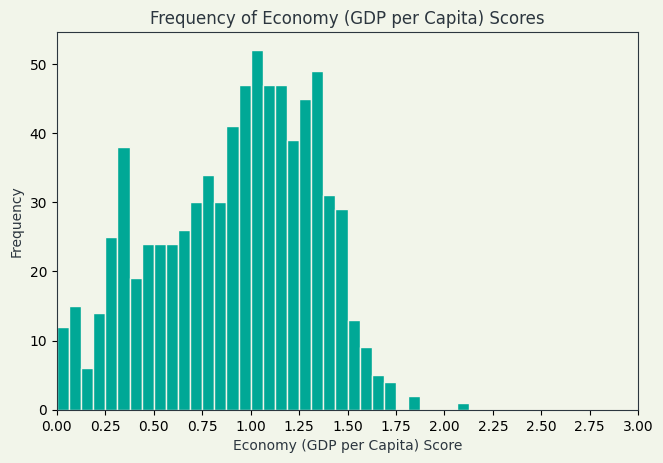

In [124]:
show_frequency('Economy (GDP per Capita)')

We see that the frequency distribution of economic scores is relatively normally-distributed, with its bell shape. Thus, we can detect if there are any outliers by computing the Z-score for each point and checking if they are greater than 3 or less than -3.

In [125]:
happy[np.abs(stats.zscore(happy['Economy (GDP per Capita)'])) > 3.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year


As we can see, there are no outlying values for the economic scores.

#### Outlying Family Scores

(<Figure size 750x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f479a5ddb90>)

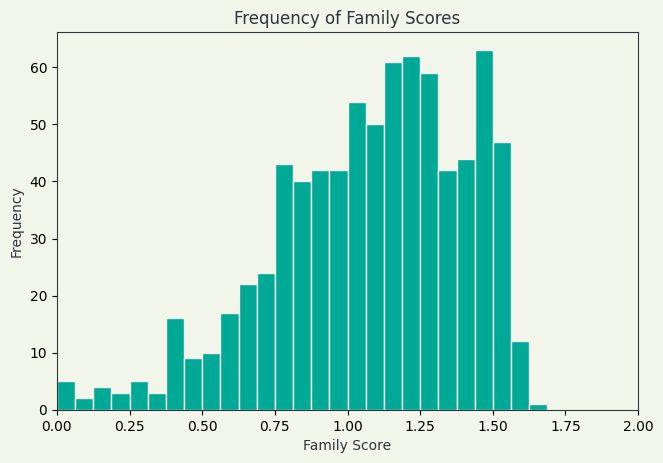

In [126]:
show_frequency('Family', x_max=2.0)

In [127]:
happy[np.abs(stats.zscore(happy['Family'])) > 3.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.061120,0.07850,0.0,0.066990,0.488790,0.082890,0.238350,2015
312,Togo,Sub-Saharan Africa,155,3.303,0.111000,0.28123,0.0,0.248110,0.346780,0.115870,0.175170,2016
469,Central African Republic,Sub-Saharan Africa,155,2.693,0.171884,0.00000,0.0,0.018773,0.270842,0.056565,0.280876,2017
624,Central African Republic,Sub-Saharan Africa,155,3.083,0.000000,0.02400,0.0,0.010000,0.305000,0.038000,0.218000,2018
780,Central African Republic,Sub-Saharan Africa,155,3.083,0.000000,0.02600,0.0,0.105000,0.225000,0.035000,0.235000,2019


Some outlying family scores fall out by three standard deviations from the mean. We simply substitute these values with the mean family score to address the issue. It should be noted that these values are correlated with the country. It indicates that although they are outlying values, they may not have occurred because of data entry errors.

In [128]:
happy.loc[np.abs(stats.zscore(happy['Family'])) > 3.0, 'Family'] = np.nan
happy.fillna(np.nanmean(happy['Family']), inplace=True)
happy

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.349510,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.402230,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.360580,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.330950,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.322610,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,Sub-Saharan Africa,152,3.334,0.00000,0.35900,0.711000,0.61400,0.55500,0.41100,0.21700,2019
778,Tanzania,Sub-Saharan Africa,153,3.231,0.00000,0.47600,0.885000,0.49900,0.41700,0.14700,0.27600,2019
779,Afghanistan,Southern Asia,154,3.203,0.00000,0.35000,0.517000,0.36100,0.00000,0.02500,0.15800,2019
780,Central African Republic,Sub-Saharan Africa,155,3.083,0.00000,0.02600,1.085332,0.10500,0.22500,0.03500,0.23500,2019


#### Outlying Health Scores

(<Figure size 750x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f479a56de50>)

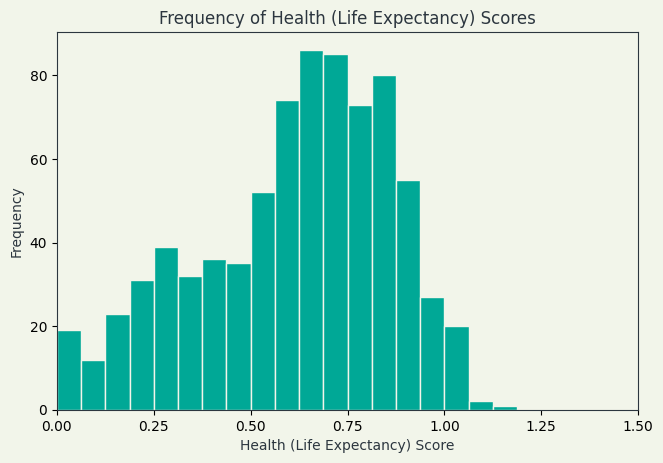

In [129]:
show_frequency('Health (Life Expectancy)', x_max=1.5)

In [130]:
happy[np.abs(stats.zscore(happy['Health (Life Expectancy)'])) > 3.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year


Similar to the economic scores, the distribution of health scores visually fits a normal distribution. Furthermore, there are no outliers in the health scores.

#### Outlying Freedom Scores

(<Figure size 750x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f479a483c90>)

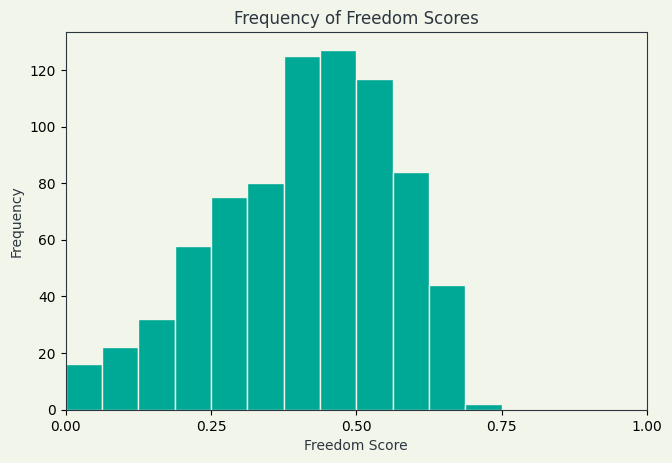

In [131]:
show_frequency('Freedom', x_max=1.0, group=0.0625)

In [132]:
happy[np.abs(stats.zscore(happy['Freedom'])) > 3.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year


As with the previous economic and health scores, there are no outlying values in the freedom scores either.

#### Outlying Trust Scores


(<Figure size 750x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f479a40f1d0>)

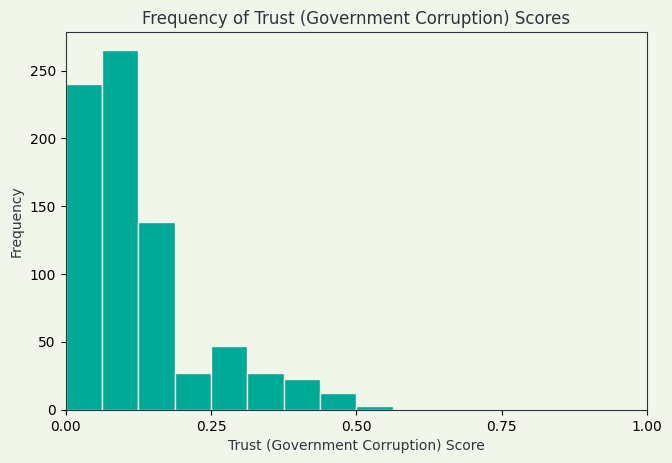

In [133]:
show_frequency('Trust (Government Corruption)', x_max=1.0, group=0.0625)

In [134]:
happy[np.abs(stats.zscore(happy['Trust (Government Corruption)'])) > 3.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
2,Denmark,Western Europe,3,7.527,0.033280,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2015
23,Singapore,Southeastern Asia,24,6.798,0.037800,1.521860,1.020000,1.025250,0.542520,0.492100,0.311050,2015
27,Qatar,Middle East and Northern Africa,28,6.611,0.062570,1.690420,1.078600,0.797330,0.640400,0.522080,0.325730,2015
153,Rwanda,Sub-Saharan Africa,154,3.465,0.034640,0.222080,0.773700,0.428640,0.592010,0.551910,0.226280,2015
158,Denmark,Western Europe,1,7.526,0.066000,1.441780,1.163740,0.795040,0.579410,0.444530,0.361710,2016
179,Singapore,Southeastern Asia,22,6.739,0.065000,1.645550,0.867580,0.947190,0.487700,0.469870,0.327060,2016
193,Qatar,Middle East and Northern Africa,36,6.375,0.197000,1.824270,0.879640,0.717230,0.566790,0.480490,0.323880,2016
309,Rwanda,Sub-Saharan Africa,152,3.515,0.071000,0.328460,0.615860,0.318650,0.543200,0.505210,0.235520,2016
340,Singapore,Southeastern Asia,26,6.572,0.064723,1.692278,1.353814,0.949492,0.549841,0.464308,0.345966,2017
465,Rwanda,Sub-Saharan Africa,151,3.471,0.072030,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,2017


The trust scores contain the most outliers within any of the categories. As with previous scores, the outlying points are correlated with specific countries. Thus, it should also be noted that the outlying trust scores are not due to data entry errors. Nonetheless, we would like to substitute these values with the mean.

In [135]:
happy.loc[np.abs(stats.zscore(happy['Trust (Government Corruption)'])) > 3.0,
          'Trust (Government Corruption)'] = np.nan

happy.fillna(np.nanmean(happy['Trust (Government Corruption)']), inplace=True)
happy

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.349510,0.94143,0.66557,0.419780,0.29678,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.402230,0.94784,0.62877,0.141450,0.43630,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.360580,0.87464,0.64938,0.119706,0.34139,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.330950,0.88521,0.66973,0.365030,0.34699,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.322610,0.90563,0.63297,0.329570,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,Sub-Saharan Africa,152,3.334,0.00000,0.35900,0.711000,0.61400,0.55500,0.411000,0.21700,2019
778,Tanzania,Sub-Saharan Africa,153,3.231,0.00000,0.47600,0.885000,0.49900,0.41700,0.147000,0.27600,2019
779,Afghanistan,Southern Asia,154,3.203,0.00000,0.35000,0.517000,0.36100,0.00000,0.025000,0.15800,2019
780,Central African Republic,Sub-Saharan Africa,155,3.083,0.00000,0.02600,1.085332,0.10500,0.22500,0.035000,0.23500,2019


#### Outlying Generosity Scores

(<Figure size 750x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f479a3a4cd0>)

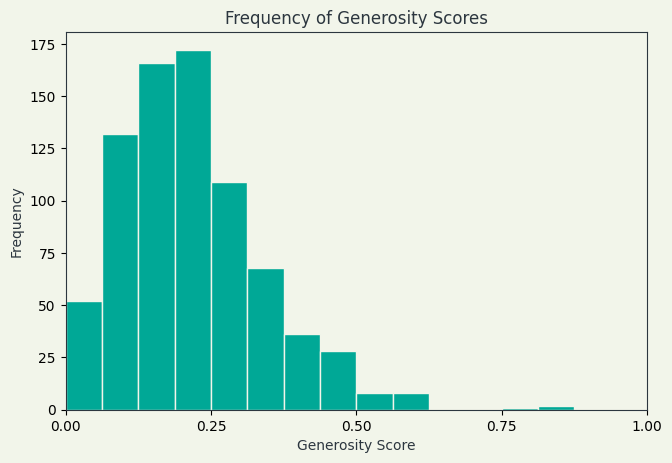

In [136]:
show_frequency('Generosity', x_max=1.0, group=0.0625)

In [137]:
happy[np.abs(stats.zscore(happy['Generosity'])) > 3.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
128,Myanmar,Southeastern Asia,129,4.307,0.043510,0.271080,0.709050,0.482460,0.440170,0.190340,0.795880,2015
190,Thailand,Southeastern Asia,33,6.474,0.078000,1.089300,1.044770,0.649150,0.495530,0.028330,0.586960,2016
276,Myanmar,Southeastern Asia,119,4.395,0.068000,0.341120,0.699810,0.398800,0.426920,0.202430,0.819710,2016
395,Indonesia,Southeastern Asia,81,5.262,0.090889,0.995539,1.274445,0.492346,0.443323,0.015317,0.611705,2017
428,Myanmar,Southeastern Asia,114,4.545,0.069740,0.367111,1.123236,0.397523,0.514492,0.188816,0.838075,2017
599,Myanmar,Southeastern Asia,130,4.308,0.000000,0.682000,1.174000,0.429000,0.580000,0.178000,0.598000,2018


Lastly, there are several outliers for the generosity score. As with every other category, we provide the same treatment. We replace the outliers with the mean.

In [138]:
happy.loc[np.abs(stats.zscore(happy['Generosity'])) > 3.0, 'Generosity'] = \
    np.nan

happy.fillna(np.nanmean(happy['Generosity']), inplace=True)
happy

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.349510,0.94143,0.66557,0.419780,0.29678,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.402230,0.94784,0.62877,0.141450,0.43630,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.360580,0.87464,0.64938,0.119706,0.34139,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.330950,0.88521,0.66973,0.365030,0.34699,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.322610,0.90563,0.63297,0.329570,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,Sub-Saharan Africa,152,3.334,0.00000,0.35900,0.711000,0.61400,0.55500,0.411000,0.21700,2019
778,Tanzania,Sub-Saharan Africa,153,3.231,0.00000,0.47600,0.885000,0.49900,0.41700,0.147000,0.27600,2019
779,Afghanistan,Southern Asia,154,3.203,0.00000,0.35000,0.517000,0.36100,0.00000,0.025000,0.15800,2019
780,Central African Republic,Sub-Saharan Africa,155,3.083,0.00000,0.02600,1.085332,0.10500,0.22500,0.035000,0.23500,2019


## Exploratory Data Analysis

With the data cleaned, we would like to perform an overall analysis to capture trends and correlations in the data. Most notably, we would like to see how the happiness scores change over time and which features heavily contribute to a higher happiness score.

### Happiness Score Central Tendencies

First, we would like to take the central tendencies of the happiness scores for each year. We do so by grouping the data by year and aggregating the happiness scores into the mean and median. Note that we do not consider the mode because the happiness scores are on a continuous interval. Thus, it will only determine which values are repeated because of a coincidence.

In [139]:
central_happy = happy.groupby('Year').agg(
    mean=('Happiness Score', np.mean),
    median=('Happiness Score', np.median)
).rename(columns={
    'mean': 'Mean',
    'median': 'Median'
})

central_happy

,Mean,Median
Year,,
2015,5.375734,5.2325
2016,5.382185,5.3140
2017,5.354019,5.2790
2018,5.375917,5.3780
2019,5.407096,5.3795


Now, we plot the central tendencies on a line graph to visualize the changes over the years.

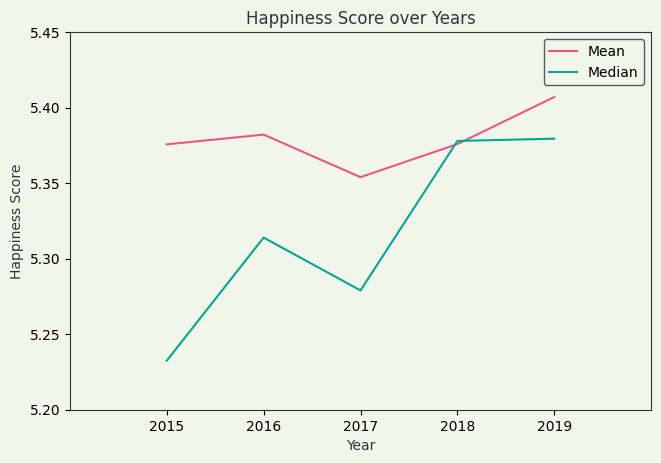

In [140]:
cnt_hap_fig, cnt_hap_ax = plt.subplots(figsize=[7.5, 5], dpi=100)
set_color(cnt_hap_fig, cnt_hap_ax)

cnt_hap_ax.set(xlim=(2014, 2020), xticks=np.arange(2015, 2020, 1),
               xlabel='Year', ylim=(5.2, 5.45),
               yticks=np.arange(5.2, 5.50, 0.05), ylabel='Happiness Score',
               title='Happiness Score over Years', facecolor=ivory)

cnt_hap_ax.plot(central_happy.index, central_happy['Mean'], c=blush)

cnt_hap_ax.plot(central_happy.index, central_happy['Median'], c=persian_green)

cnt_hap_ax.legend(['Mean', 'Median'], facecolor=ivory, edgecolor=gunmetal)

From the line graph, both the means and medians generally increase. It indicates that the happiness score tends to be raised throughout time. However, it is interesting that both central tendencies dipped in 2017. It can suggest that there may have been a global event that affected the well-being and happiness of individuals during that time.

### Happiness Ranks

Next, we would like to check which countries improved or maintained their happiness rankings. We need to have a clear definition of improving a rank and what it means to have a steady score.
For a country to have improved its ranking throughout five years, its rank must have increased every year. For a country to have a steady happiness level, its score must not change or incur the least amount of change throughout the years.

In [141]:
# Calculates total change in a series.
def get_total_change(series):
    total_change = 0
    last = 0
    for index, value in series.items():
        if last >= 0:
            total_change += np.abs(value - last)

        last = value
    return total_change

# Groups data by country and then calculates the total change in happiness rank
# for each country.
steady_happy = happy.groupby('Country').agg(
    total_change=('Happiness Rank', get_total_change),
    minimum_rank=('Happiness Rank', np.min),
    maximum_rank=('Happiness Rank', np.max)
).rename(columns={
    'total_change': 'Total Happiness Rank Change',
    'minimum_rank': 'Minimum Happiness Rank',
    'maximum_rank': 'Maximum Happiness Rank'
}).reset_index().sort_values('Total Happiness Rank Change')

steady_happy

,Country,Total Happiness Rank Change,Minimum Happiness Rank,Maximum Happiness Rank
60,Iceland,4,2,4
142,Switzerland,6,1,6
38,Denmark,8,1,3
25,Canada,9,5,9
108,Norway,9,1,4
...,...,...,...,...
55,Guinea,184,118,151
21,Burkina Faso,189,115,152
42,Egypt,199,104,137
68,Ivory Coast,203,99,151


In [142]:
def is_decreasing(series):
    last = float('inf')
    for index, value in series.items():
        if value > last:
            return False
        last = value
    return True

increase_happy = happy.groupby('Country').filter(
    lambda df : is_decreasing(df['Happiness Rank'])
).groupby('Country').agg(
    total_change=('Happiness Rank', get_total_change)
).reset_index(
).rename(columns={'total_change': 'Total Change'}
).sort_values('Total Change', ascending=False)

increase_happy

,Country,Total Change
1,Benin,208
16,Ivory Coast,203
3,Burkina Faso,189
4,Cambodia,181
34,Togo,177
...,...,...
22,Oman,22
25,Puerto Rico,15
11,Finland,11
20,New Zealand,10


### Visualize the relationship between happiness score and other features such as GDP, social support, freedom, etc.

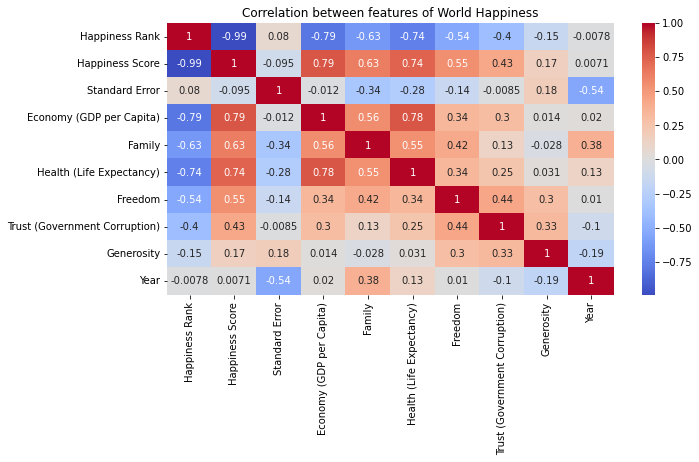

In [143]:
#create a heatmap so see the relationship between the happiness score and other features

import seaborn as sns

plt.figure(figsize=(10, 5))
sns.heatmap(happy.corr(), cmap="coolwarm", annot = True)
plt.title('Correlation between features of World Happiness')
plt.show()

### Find out what features contribute to happiness. If you are the president of a country, what would you do to make citizens happier?

From the heatmap, we can see that Happiness Score's correlation with other features from most correlated to least correlated is Economy, Health, Family, Freedom , Trust, and then Generosity. With a correlation of greater than 0.7, Happiness Score in a country and more tied in with their GDP and their life expectancy. 


Therefore if we were the president of a country, we would first increase the GDP per capita of the country as there is a strong correlation between the GDP and Happiness score. To increase the GDP, we would improve the quality of education and increase job skills within the country. This will also increase the life expectancy of the country as it is highly correlated with GDP.

# Modeling and Question Answering

### Model 1: Linear Regression

Linear Regression is a model to determine the relationship between numerical features. It is very easy to understand and makes a good baseline model to understand the dataset. 

In [144]:
# seperate into training and testing sets
testing = happy.loc[happy['Year'] == 2019]
training =happy.loc[happy['Year'].isin([2015, 2016, 2017, 2018])]

In [145]:
#create training data and testing data
#training data
train_lr_x = training[['Economy (GDP per Capita)', 'Freedom']]
train_lr_y= training['Happiness Score']
#testing data
test_lr_y = testing['Happiness Score']
test_lr_x = testing[['Economy (GDP per Capita)', 'Freedom']]

For our training data, we only use the 'Economy (GDP per Capita)' and 'Freedom' feature as those two features are not highly correlated with each other and they have high correlation with 'Happiness Score'.

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

happinessLR = LinearRegression()
happinessLR.fit(train_lr_x, train_lr_y)

LinearRegression()

In [147]:
y_predict = happinessLR.predict(test_lr_x)
y_predict

array([6.59122894, 6.6626267 , 6.88615273, 6.65461629, 6.60418699,
       6.74503096, 6.62752092, 6.4955916 , 6.60982775, 6.50736622,
       6.5590498 , 5.92573599, 5.93800508, 6.93136353, 6.23229828,
       6.70080218, 6.41409853, 6.33002468, 6.42984292, 6.12851025,
       6.90252219, 6.44021604, 5.69740954, 6.18221622, 6.06366581,
       5.68480568, 5.43117848, 6.33789757, 7.14109672, 5.93549793,
       6.04255152, 5.47144719, 6.01211142, 6.93282477, 5.17122711,
       5.64030188, 6.49050922, 5.79395806, 6.13282728, 6.07159983,
       5.55509185, 5.67707724, 5.62517421, 6.36122596, 4.99499678,
       5.47645734, 5.8287791 , 5.93911491, 5.9964448 , 5.55419315,
       6.64821296, 5.95345919, 5.51721776, 5.48295232, 6.15832113,
       5.38290908, 5.94538211, 6.20917269, 5.06771411, 5.83665338,
       5.3292031 , 5.38961102, 5.48488445, 6.02249564, 5.54263244,
       6.15901702, 4.67409715, 5.67547294, 5.49881342, 5.21567534,
       4.52810134, 5.60825054, 5.10276708, 4.50803297, 5.53281

Text(0.5, 1.0, 'Actual vs. Predicted')

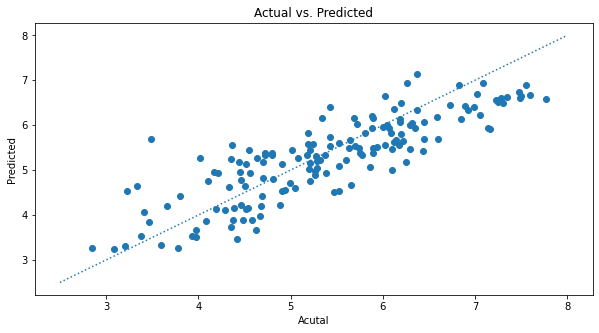

In [148]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(test_lr_y, y_predict)
xpoints = np.array([2.5, 3, 4, 5, 6, 7, 8])
ypoints = np.array([2.5, 3, 4, 5, 6, 7, 8])
plt.plot(xpoints, ypoints, linestyle = 'dotted')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Actual vs. Predicted')

In [149]:
np.column_stack((y_predict, test_lr_y))

array([[6.59122894, 7.769     ],
       [6.6626267 , 7.6       ],
       [6.88615273, 7.554     ],
       [6.65461629, 7.494     ],
       [6.60418699, 7.488     ],
       [6.74503096, 7.48      ],
       [6.62752092, 7.343     ],
       [6.4955916 , 7.307     ],
       [6.60982775, 7.278     ],
       [6.50736622, 7.246     ],
       [6.5590498 , 7.228     ],
       [5.92573599, 7.167     ],
       [5.93800508, 7.139     ],
       [6.93136353, 7.09      ],
       [6.23229828, 7.054     ],
       [6.70080218, 7.021     ],
       [6.41409853, 6.985     ],
       [6.33002468, 6.923     ],
       [6.42984292, 6.892     ],
       [6.12851025, 6.852     ],
       [6.90252219, 6.825     ],
       [6.44021604, 6.726     ],
       [5.69740954, 6.595     ],
       [6.18221622, 6.592     ],
       [6.06366581, 6.446     ],
       [5.68480568, 6.444     ],
       [5.43117848, 6.436     ],
       [6.33789757, 6.375     ],
       [7.14109672, 6.374     ],
       [5.93549793, 6.354     ],
       [6.

In [150]:
rms = mean_squared_error(test_lr_y, y_predict, squared=False) 
print(rms)

0.6058271239843792


The root mean squared shows us that the standard deviation of the predicated values compared to the actual values is only 0.6.

In [151]:
#compare the 
Predictions = pd.DataFrame({'Prediction Happiness': y_predict, 'Actual Happiness': test_lr_y})
Predictions.insert(0, 'Actual Rankings', range(1, 1+len(Predictions)))
Predictions = Predictions.sort_values(by='Prediction Happiness', ascending=False)
Predictions.insert(0, 'Predicted Rankings', range(1, 1+len(Predictions)))
print(Predictions.to_markdown())

|     |   Predicted Rankings |   Actual Rankings |   Prediction Happiness |   Actual Happiness |
|----:|---------------------:|------------------:|-----------------------:|-------------------:|
| 654 |                    1 |                29 |                7.1411  |              6.374 |
| 659 |                    2 |                34 |                6.93282 |              6.262 |
| 639 |                    3 |                14 |                6.93136 |              7.09  |
| 646 |                    4 |                21 |                6.90252 |              6.825 |
| 628 |                    5 |                 3 |                6.88615 |              7.554 |
| 631 |                    6 |                 6 |                6.74503 |              7.48  |
| 641 |                    7 |                16 |                6.7008  |              7.021 |
| 627 |                    8 |                 2 |                6.66263 |              7.6   |
| 629 |                    9 |

### Model 2: Ridge Regression
Other options? Least Absolute Deviation Regression


In [218]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [219]:
# seperate into training and testing sets
testing2 = happy.loc[happy['Year'] == 2019]
training2 = happy.loc[happy['Year'].isin([2015, 2016, 2017, 2018])]

In [220]:
target_column2 = ['Happiness Score']
not_used2 =  ['Country', 'Region', 'Happiness Rank', 'Year', 'Standard Error']
excluded2 = target_column2 + not_used2
excluded2

['Happiness Score',
 'Country',
 'Region',
 'Happiness Rank',
 'Year',
 'Standard Error']

In [221]:
predictors2 = list(set(list(training2.columns))-set(excluded2))

In [222]:
X2 = training2[predictors2].values
Y2 = training2[target_column2].values

In [223]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.30, random_state=40)

In [224]:
print(X2_train.shape); print(X2_test.shape)

(438, 6)
(188, 6)


In [225]:
from sklearn.linear_model import Ridge

# define model
ridgeReg = Ridge(alpha=1.0)


ridgeReg.fit(X2_train, Y2_train) 
pred_train_ridgeReg = ridgeReg.predict(testing2.drop(excluded2, axis = 1).values)

In [226]:
rms2 = mean_squared_error(testing2['Happiness Score'], pred_train_ridgeReg, squared=False) 
print(rms2)

0.5758837127385211


In [227]:
predictedRankings2 = testing2.copy()

In [228]:
predictedRankings2['Happiness Score'] = pred_train_ridgeReg

In [229]:
testing2

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
626,Finland,Western Europe,1,7.769,0.0,1.340,1.587000,0.986,0.596,0.393,0.153,2019
627,Denmark,Western Europe,2,7.600,0.0,1.383,1.573000,0.996,0.592,0.410,0.252,2019
628,Norway,Western Europe,3,7.554,0.0,1.488,1.582000,1.028,0.603,0.341,0.271,2019
629,Iceland,Western Europe,4,7.494,0.0,1.380,1.624000,1.026,0.591,0.118,0.354,2019
630,Netherlands,Western Europe,5,7.488,0.0,1.396,1.522000,0.999,0.557,0.298,0.322,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,Sub-Saharan Africa,152,3.334,0.0,0.359,0.711000,0.614,0.555,0.411,0.217,2019
778,Tanzania,Sub-Saharan Africa,153,3.231,0.0,0.476,0.885000,0.499,0.417,0.147,0.276,2019
779,Afghanistan,Southern Asia,154,3.203,0.0,0.350,0.517000,0.361,0.000,0.025,0.158,2019
780,Central African Republic,Sub-Saharan Africa,155,3.083,0.0,0.026,1.085332,0.105,0.225,0.035,0.235,2019


In [230]:
predictedRankings2

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
626,Finland,Western Europe,1,6.666243,0.0,1.340,1.587000,0.986,0.596,0.393,0.153,2019
627,Denmark,Western Europe,2,6.835956,0.0,1.383,1.573000,0.996,0.592,0.410,0.252,2019
628,Norway,Western Europe,3,6.888524,0.0,1.488,1.582000,1.028,0.603,0.341,0.271,2019
629,Iceland,Western Europe,4,6.625989,0.0,1.380,1.624000,1.026,0.591,0.118,0.354,2019
630,Netherlands,Western Europe,5,6.710150,0.0,1.396,1.522000,0.999,0.557,0.298,0.322,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,Sub-Saharan Africa,152,5.081384,0.0,0.359,0.711000,0.614,0.555,0.411,0.217,2019
778,Tanzania,Sub-Saharan Africa,153,4.679890,0.0,0.476,0.885000,0.499,0.417,0.147,0.276,2019
779,Afghanistan,Southern Asia,154,3.445801,0.0,0.350,0.517000,0.361,0.000,0.025,0.158,2019
780,Central African Republic,Sub-Saharan Africa,155,3.610647,0.0,0.026,1.085332,0.105,0.225,0.035,0.235,2019


In [231]:
predictedRankings2['Happiness Rank'] = predictedRankings2['Happiness Score'].rank(method='max', ascending=False)

In [232]:
predictedRankings2

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
626,Finland,Western Europe,11.0,6.666243,0.0,1.340,1.587000,0.986,0.596,0.393,0.153,2019
627,Denmark,Western Europe,3.0,6.835956,0.0,1.383,1.573000,0.996,0.592,0.410,0.252,2019
628,Norway,Western Europe,1.0,6.888524,0.0,1.488,1.582000,1.028,0.603,0.341,0.271,2019
629,Iceland,Western Europe,13.0,6.625989,0.0,1.380,1.624000,1.026,0.591,0.118,0.354,2019
630,Netherlands,Western Europe,9.0,6.710150,0.0,1.396,1.522000,0.999,0.557,0.298,0.322,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,Sub-Saharan Africa,98.0,5.081384,0.0,0.359,0.711000,0.614,0.555,0.411,0.217,2019
778,Tanzania,Sub-Saharan Africa,119.0,4.679890,0.0,0.476,0.885000,0.499,0.417,0.147,0.276,2019
779,Afghanistan,Southern Asia,156.0,3.445801,0.0,0.350,0.517000,0.361,0.000,0.025,0.158,2019
780,Central African Republic,Sub-Saharan Africa,154.0,3.610647,0.0,0.026,1.085332,0.105,0.225,0.035,0.235,2019


## Model 3: Robust Regresssion (RANdom SAmple Consensus (RANSAC))

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [234]:
# seperate into training and testing sets
testing3 = happy.loc[happy['Year'] == 2019]
training3 = happy.loc[happy['Year'].isin([2015, 2016, 2017, 2018])]

In [235]:
target_column3 = ['Happiness Score']
not_used3 =  ['Country', 'Region', 'Happiness Rank', 'Year', 'Standard Error']
excluded3 = target_column3 + not_used3
excluded3

['Happiness Score',
 'Country',
 'Region',
 'Happiness Rank',
 'Year',
 'Standard Error']

In [236]:
predictors3 = list(set(list(training3.columns))-set(excluded3))

In [237]:
X3 = training3[predictors3].values
Y3 = training3[target_column3].values

In [238]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.30, random_state=40)

In [239]:
print(X3_train.shape); print(X3_test.shape)

(438, 6)
(188, 6)


In [240]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(),
		max_trials=100, 		# Number of Iterations
		min_samples=20, 		# Minimum size of the sample
		loss='absolute_error', 	# Metrics for loss #absolute_loss was before
		residual_threshold=10 	# Threshold
		)

# Train model
ransac.fit(X3_train, Y3_train)

pred_train_ransac = ransac.predict(testing3.drop(excluded3, axis = 1).values)

rms4 = mean_squared_error(testing3['Happiness Score'], pred_train_ransac, squared=False) 
print(rms4)

0.5811039449579765


# Formula to calculate Happiness score

In [243]:
ridgeReg.coef_

array([[0.62788957, 0.62607593, 1.28876482, 1.04780362, 1.37226637,
        1.2066021 ]])

In [244]:
ridgeReg.intercept_


array([2.21216454])

Our formula for Happiness Score based on Ridge Regression is: 

$$
  Happiness Score = (0.62788957 * Economy) + (0.62607593 * Family) + (1.28876482 * Health) + (1.04780362*Freedom) + (1.37226637 * Trust) + (1.2066021 * Generosity) + 2.21216454
$$